Reading and viewing the data

In [1]:
import pandas as pd
data = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
rows = data.shape[0]
cols = data.shape[1]
print(f'Rows : {rows}\nColumns : {cols}')

Rows : 918
Columns : 12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No null value found

In [4]:
#statistical details
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Target column is a bit unbalanced

# EDA

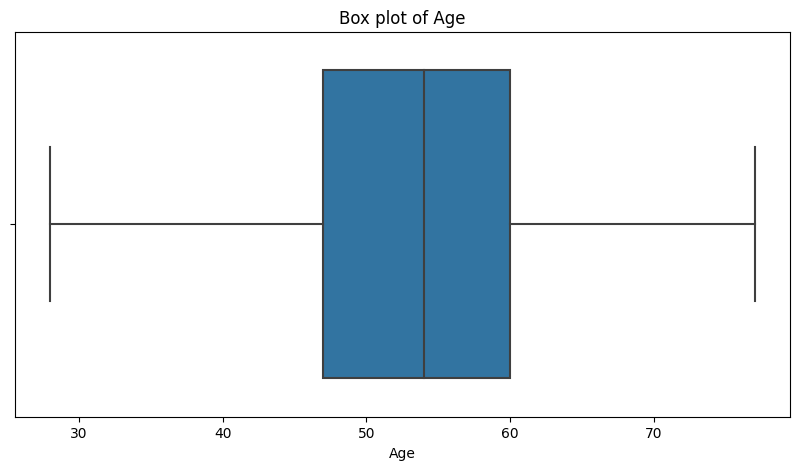

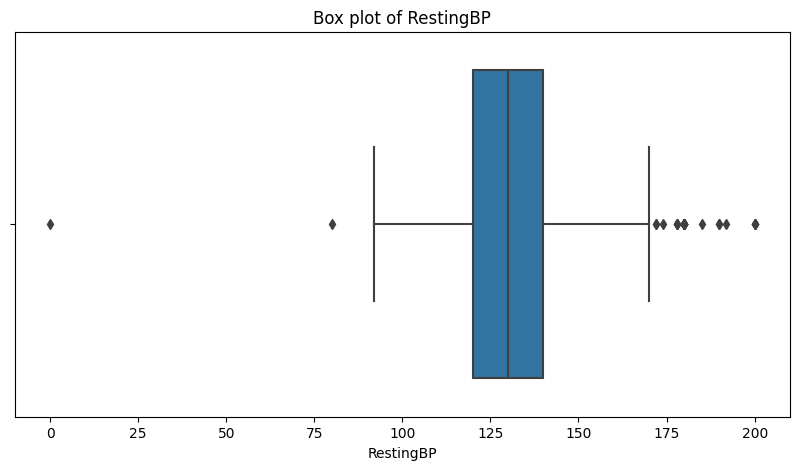

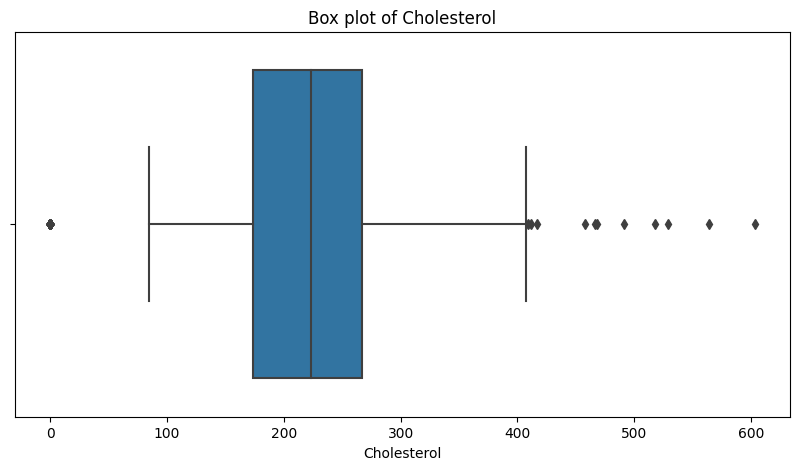

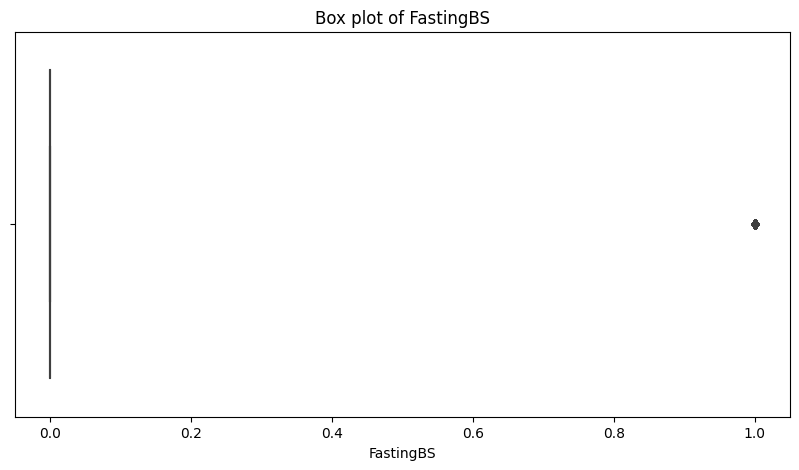

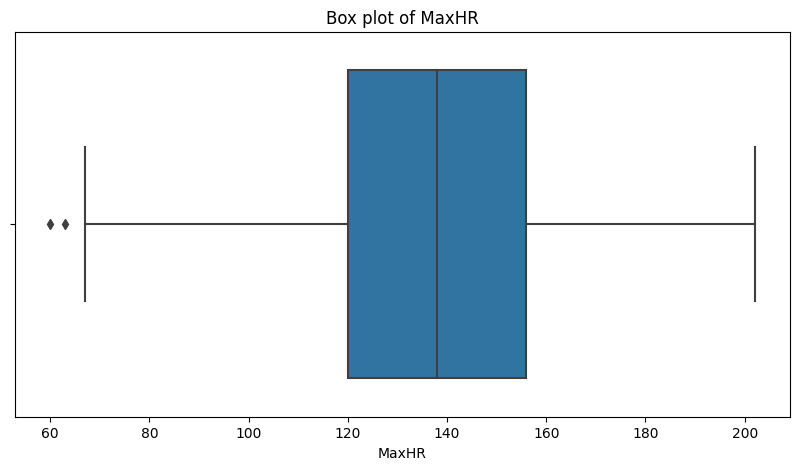

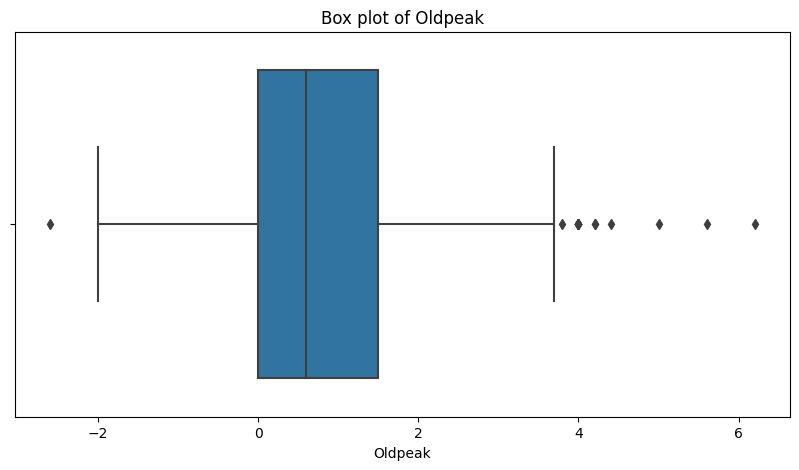

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous columns
continuous_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Plotting box plots for each continuous column
for column in continuous_columns:
    plt.figure(figsize=(10, 5)) 
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()


There are multible outliers but I will try to modeling and see the outcomes before dealing with it

HeartDisease         0         1
Sex                             
F             0.740933  0.259067
M             0.368276  0.631724


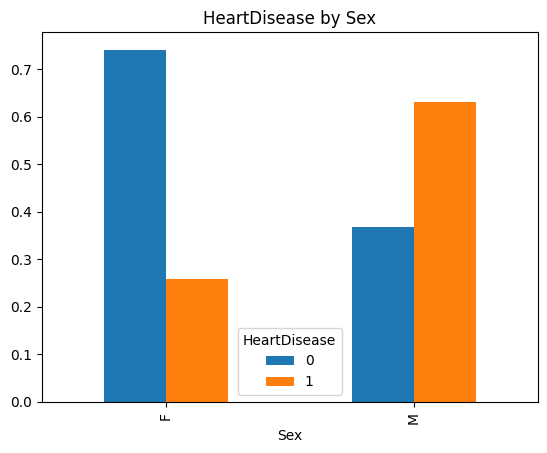

In [7]:
gender_heart = pd.crosstab(data['Sex'], data['HeartDisease'],normalize='index')
print(gender_heart)
gender_heart.plot(kind='bar')
plt.title('HeartDisease by Sex')
plt.show()

based on this chart Men having more heart disease more the Women

HeartDisease          0         1
ChestPainType                    
ASY            0.209677  0.790323
ATA            0.861272  0.138728
NAP            0.645320  0.354680
TA             0.565217  0.434783


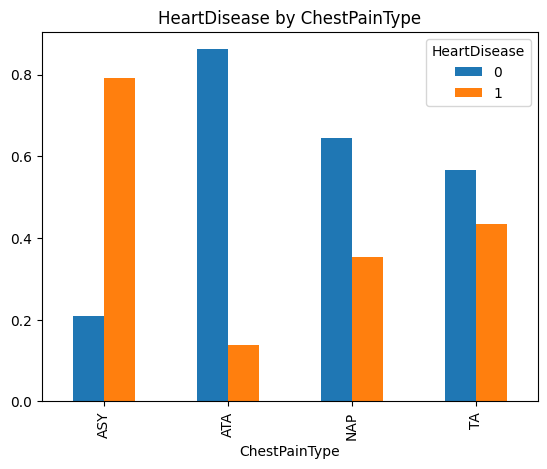

In [8]:
chest_heart = pd.crosstab(data['ChestPainType'], data['HeartDisease'],normalize='index')
print(chest_heart)
chest_heart.plot(kind='bar')
plt.title('HeartDisease by ChestPainType')
plt.show()

HeartDisease         0         1
RestingECG                      
LVH           0.436170  0.563830
Normal        0.483696  0.516304
ST            0.342697  0.657303


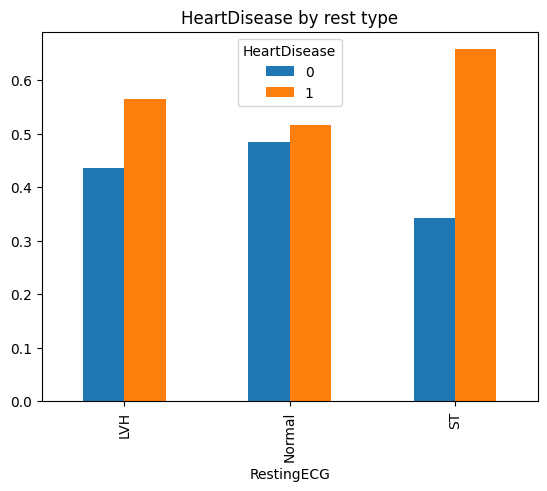

In [9]:
rest_heart = pd.crosstab(data['RestingECG'], data['HeartDisease'],normalize='index')
print(rest_heart)
rest_heart.plot(kind='bar')
plt.title('HeartDisease by rest type')
plt.show()

HeartDisease           0         1
ExerciseAngina                    
N               0.648995  0.351005
Y               0.148248  0.851752


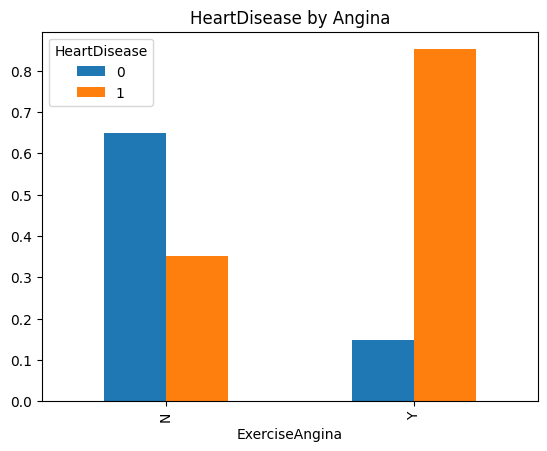

In [10]:
angina_heart = pd.crosstab(data['ExerciseAngina'], data['HeartDisease'],normalize='index')
print(angina_heart)
angina_heart.plot(kind='bar')
plt.title('HeartDisease by Angina')
plt.show()

Having Angina most likely you will have heart failure

HeartDisease         0         1
ST_Slope                        
Down          0.222222  0.777778
Flat          0.171739  0.828261
Up            0.802532  0.197468


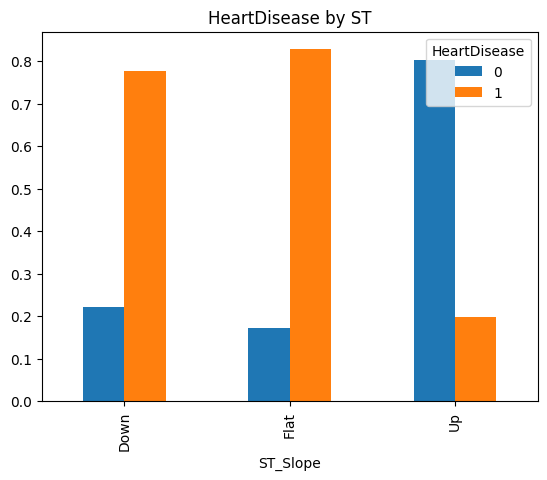

In [11]:
st_heart = pd.crosstab(data['ST_Slope'], data['HeartDisease'],normalize='index')
print(st_heart)
st_heart.plot(kind='bar')
plt.title('HeartDisease by ST')
plt.show()

ST slope is indecation also of heart failure

HeartDisease         0         1
FastingBS                       
0             0.519886  0.480114
1             0.205607  0.794393


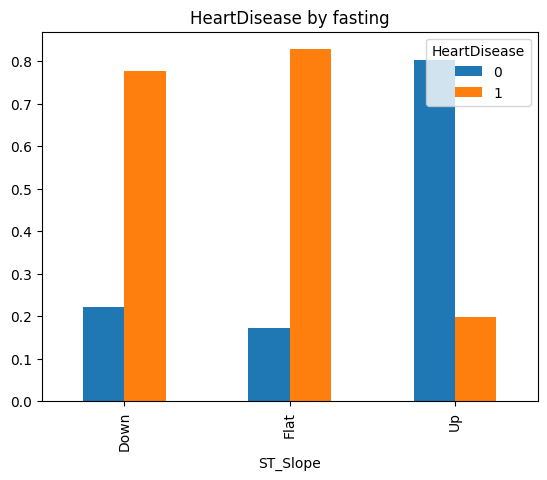

In [12]:
fasting_heart = pd.crosstab(data['FastingBS'], data['HeartDisease'],normalize='index')
print(fasting_heart)
st_heart.plot(kind='bar')
plt.title('HeartDisease by fasting')
plt.show()

Fasting also has affect on heart failure

visualize changes on continuous data

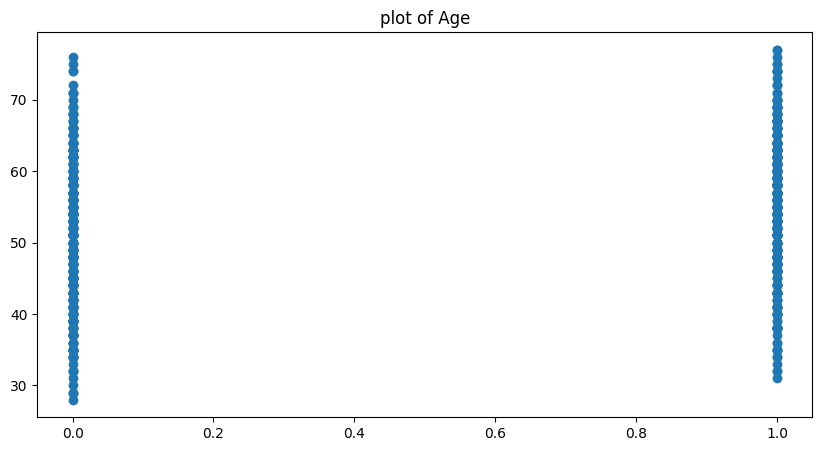

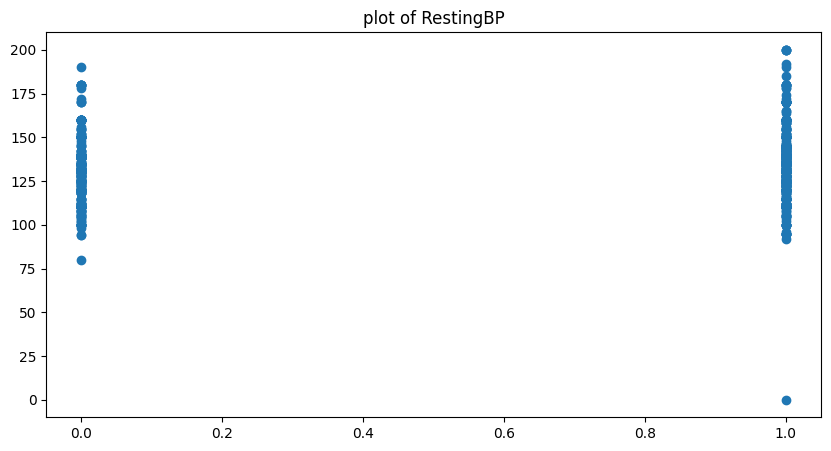

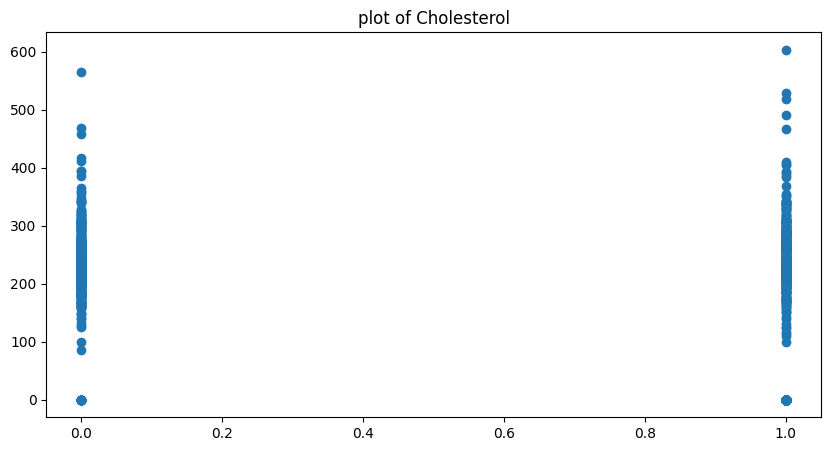

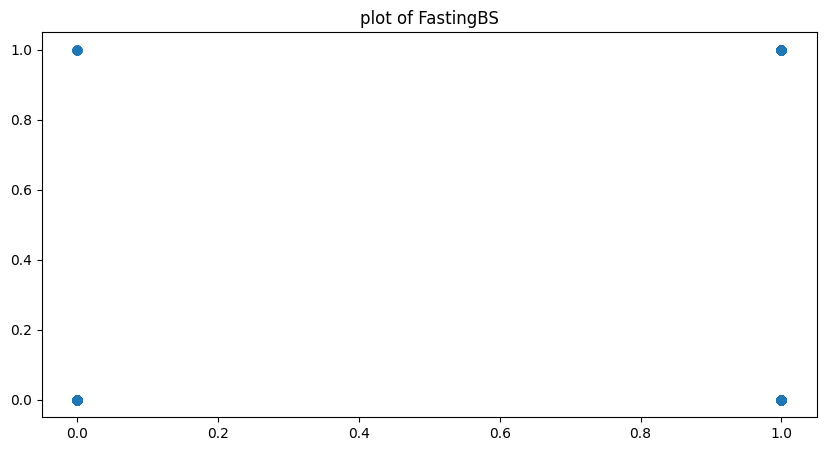

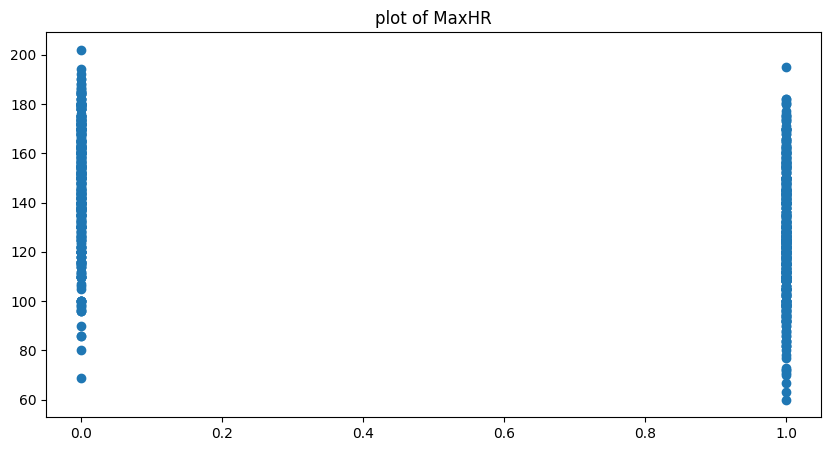

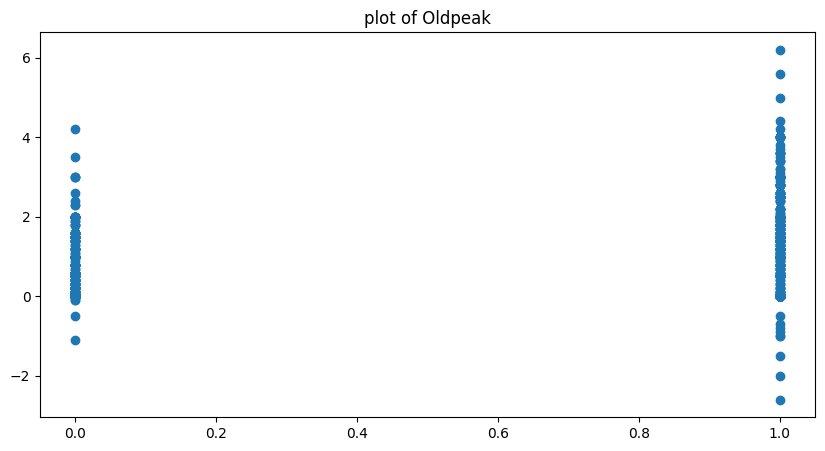

In [13]:
for column in continuous_columns:
  plt.figure(figsize=(10, 5))  # Set the figure size as desired
  plt.plot(data['HeartDisease'],data[column],linestyle='none', marker='o')
  plt.title(f'plot of {column}')
  plt.show()

# PreProcessing

Convert categorical data to numerical

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

Normalization

In [15]:
data = data / data.max()

# Training & Testing

In [16]:
from sklearn.model_selection import train_test_split
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=data['FastingBS']
)

I'm stratifing this column cuz it's highly unbalanced and I want to split fair portions from it

In [17]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Adjusting the parameters of the Random Forest
model_rf= RandomForestClassifier(n_estimators=50,  # number of estimators
                                         random_state=42)
model_rf.fit(X_train, y_train)

# Adjusting parameters for XGBoost
model_xgb = XGBClassifier(n_estimators=100,
                                 max_depth=3,  # limiting depth of trees
                                 learning_rate=0.1,  # potentially adding regularization via learning rate
                                 subsample=0.8,  # using a subsample of data to prevent overfitting
                                 colsample_bytree=0.7,  # using a subsample of features for each tree
                                 eval_metric='logloss',
                                 random_state=42)

model_xgb.fit(X_train, y_train)

# Recreate the stacked model with base models
model_stack = StackingClassifier(estimators=[('rf', model_rf),
                                                    ('xgb', model_xgb)],
                                        final_estimator=LogisticRegression(),
                                        stack_method='auto',
                                        n_jobs=-1)
model_stack.fit(X_train, y_train)

# Evaluate the pruned model
y_pred = model_stack.predict(X_test)
metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
}

print(metrics)


{'accuracy': 0.907608695652174, 'precision': 0.9107142857142857, 'recall': 0.9357798165137615, 'f1': 0.9230769230769231}


# Feature Importance

In [18]:
# Get feature importances from RandomForestClassifier
importances_rf = model_rf.feature_importances_
features = X_train.columns
importances_rf_dict = dict(zip(features, importances_rf))
sorted_importances_rf = sorted(importances_rf_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature importances from Random Forest:")
for feature, importance in sorted_importances_rf:
    print(f"{feature}: {importance}")

# Get feature importances from XGBoost
importances_xgb = model_xgb.feature_importances_
importances_xgb_dict = dict(zip(features, importances_xgb))
sorted_importances_xgb = sorted(importances_xgb_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature importances from XGBoost:")
for feature, importance in sorted_importances_xgb:
    print(f"{feature}: {importance}")

Feature importances from Random Forest:
ST_Slope: 0.21900350843265542
Cholesterol: 0.11614969583831752
ChestPainType: 0.11473519381230739
MaxHR: 0.11081418028186905
Oldpeak: 0.10948878239475818
ExerciseAngina: 0.0940729487344156
Age: 0.08022767477386052
RestingBP: 0.07858468508468472
RestingECG: 0.028125742820119818
Sex: 0.027884311091323537
FastingBS: 0.020913276735688314

Feature importances from XGBoost:
ST_Slope: 0.31917333602905273
ChestPainType: 0.16173650324344635
ExerciseAngina: 0.14603181183338165
FastingBS: 0.06605455279350281
Sex: 0.05703895911574364
Oldpeak: 0.05463773384690285
Cholesterol: 0.04760991781949997
MaxHR: 0.044129274785518646
RestingECG: 0.04399832338094711
Age: 0.030759083107113838
RestingBP: 0.02883044071495533
